In [3]:
using PyPlot

In [4]:
include("../compute_ttv.jl")
importall TTVFaster

### 0. Read and plot TTV data 

In [12]:
dat1 = readdlm("../ttv_planet1.txt")
t1 = dat1[:,1]
dat2 = readdlm("../ttv_planet2.txt")
t2 = dat2[:,1];

In [58]:
per1 = mean(t1[2:end]-t1[1:end-1])
per2 = mean(t2[2:end]-t2[1:end-1]);

In [59]:
println(per1,'\n',per2)
# 5. venus and earth!

224.70076641863517
365.25630708152175


In [60]:
x1 = collect(0:1:length(t1)-1)
x2 = collect(0:1:length(t2)-1);

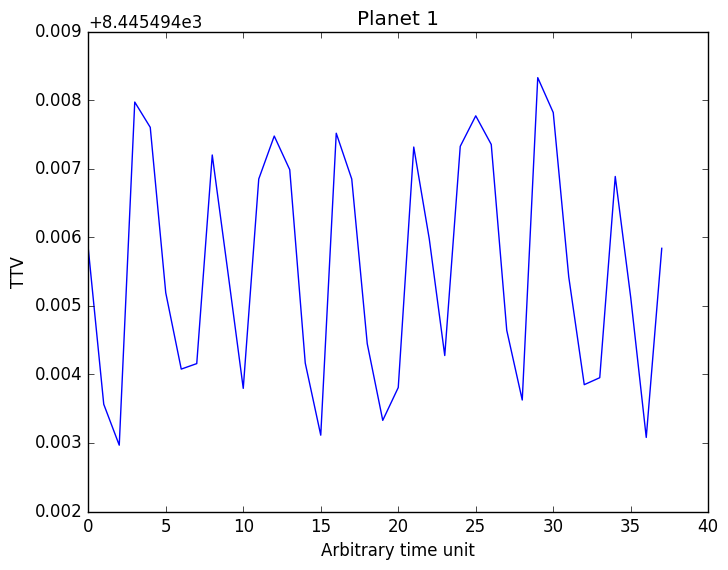

In [61]:
plot(x1,t1-(x1*per1))
xlabel("Arbitrary time unit")
ylabel("TTV")
title("Planet 1");

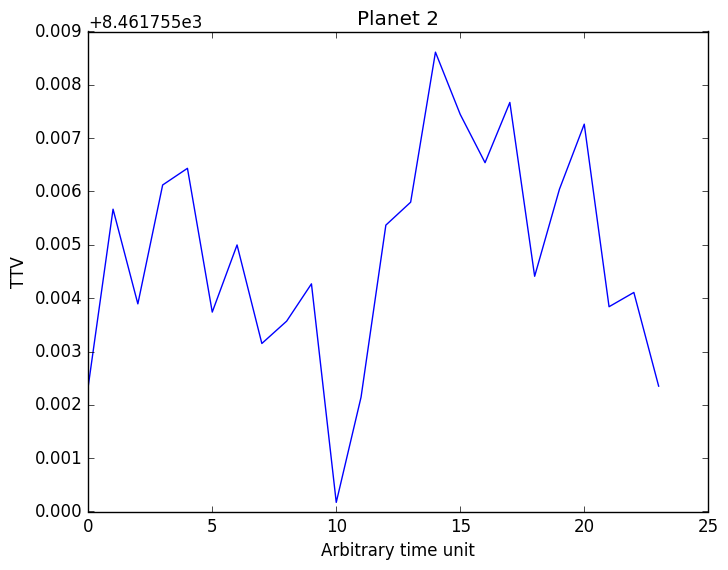

In [62]:
plot(x2,t2-(x2*per2))
xlabel("Arbitrary time unit")
ylabel("TTV")
title("Planet 2");

### 1. Create a wrapper for compute_ttv.jl which calls N(N-1) pairs of planets to compute the TTV of each planet due to all of the others.

In [65]:
function make_plane(mass_ratio::Float64,period::Float64,t0::Float64,ecosw::Float64,esinw::Float64)
    plane = TTVFaster.Planet_plane_hk(mass_ratio, period, t0, ecosw, esinw)
    return plane
end

make_plane (generic function with 1 method)

In [68]:
plane1 = make_plane(.01,per1,1.,0.1,0.1)
plane2 = make_plane(.01,per2,1.,0.1,0.1)

TTVFaster.Planet_plane_hk{Float64}(0.01,365.25630708152175,1.0,0.1,0.1)

In [101]:
function compute_ttv_pairs(n_p::Int64,planets::Array{Planet_plane_hk},times::Array{Float64})
    ttvs = Array{Array{Float64}}(n_p)
    for i=1:n_p-1 #for each planet
        for j=i:n_p #go to each other planet
            if i!= j #make sure its not this planet
                compute_ttv!(jmax,planets[i],planets[j],times[i],times[j],ttvs[i],ttvs[j]) #compute ttvs, add to array
            end
        end
    end
    return ttvs
end

compute_ttv_pairs (generic function with 4 methods)

In [102]:
compute_ttv_pairs(2,[plane1,plane2],Array[t1,t2])

LoadError: LoadError: MethodError: `compute_ttv_pairs` has no method matching compute_ttv_pairs(::Int64, ::Array{Array{T,N},1})
Closest candidates are:
  compute_ttv_pairs(::Int64, !Matched::Array{TTVFaster.Planet_plane_hk{T<:Number},N}, !Matched::Array{Array{T,1},N})
  compute_ttv_pairs(::Int64, !Matched::Array{Array{T,1},N})
  compute_ttv_pairs(::Int64, !Matched::Array{TTVFaster.Planet_plane_hk{T<:Number},N}, !Matched::Array{Float64,N})
  ...
while loading In[102], in expression starting on line 1

In [90]:
[plane1,plane2]

2-element Array{TTVFaster.Planet_plane_hk{Float64},1}:
 TTVFaster.Planet_plane_hk{Float64}(0.01,224.70076641863517,1.0,0.1,0.1)
 TTVFaster.Planet_plane_hk{Float64}(0.01,365.25630708152175,1.0,0.1,0.1)